## 164 - MetPy 1.0 XArray Basics with the GFS

[Youtube](https://www.youtube.com/watch?v=qRi5G5alJYQ)

In [1]:
from siphon.catalog import TDSCatalog
import xarray as xr
import metpy

In [2]:
best_gfs = TDSCatalog('https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')
best_ds = best_gfs.datasets[0]

ds = xr.open_dataset(best_ds.access_urls['OPENDAP'])

In [3]:
ice = ds.metpy.parse_cf('Ice_cover_surface')
ice

<xarray.DataArray 'Ice_cover_surface' (time: 121, lat: 721, lon: 1440)>
[125627040 values with dtype=float32]
Coordinates:
  * lat        (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * lon        (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 2022-12-30 ... 2023-01-18T12:00:00
    reftime    (time) datetime64[ns] ...
    metpy_crs  object Projection: latitude_longitude
Attributes: (12/13)
    long_name:                       Ice cover @ Ground or water surface
    units:                           
    abbreviation:                    ICEC
    grid_mapping:                    LatLon_Projection
    Grib_Variable_Id:                VAR_7-0--1-0_L1
    Grib2_Parameter:                 [10  2  0]
    ...                              ...
    Grib2_Parameter_Category:        Ice
    Grib2_Parameter_Name:            Ice cover
    Grib2_Level_Type:                1
    Grib2_Level_Desc:                Ground or water surface
    Grib2_Generating_Process_Type:   Forecast
    Grib2_Statistical_Process_Type:  UnknownStatType--1

In [4]:
first_ice = ice.isel(time = 0)
first_ice

<xarray.DataArray 'Ice_cover_surface' (lat: 721, lon: 1440)>
[1038240 values with dtype=float32]
Coordinates:
  * lat        (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * lon        (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
    time       datetime64[ns] 2022-12-30
    reftime    datetime64[ns] ...
    metpy_crs  object Projection: latitude_longitude
Attributes: (12/13)
    long_name:                       Ice cover @ Ground or water surface
    units:                           
    abbreviation:                    ICEC
    grid_mapping:                    LatLon_Projection
    Grib_Variable_Id:                VAR_7-0--1-0_L1
    Grib2_Parameter:                 [10  2  0]
    ...                              ...
    Grib2_Parameter_Category:        Ice
    Grib2_Parameter_Name:            Ice cover
    Grib2_Level_Type:                1
    Grib2_Level_Desc:                Ground or water surface
    Grib2_Generating_Process_Type:   Forecast
    Grib2_Statistical_Process_Type:  UnknownStatType--1

In [5]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
%matplotlib inline

/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/jessica/anaconda3/lib/python3.9/site-p

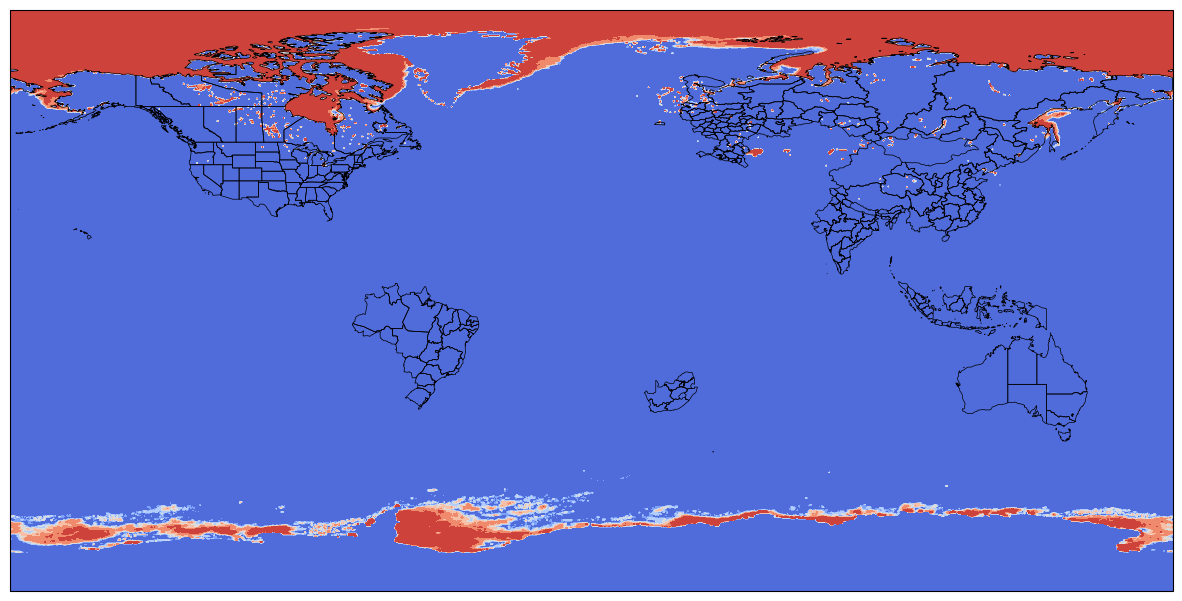

In [6]:
fig = plt.figure(figsize = (15, 12))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth = 0.5)

cf = ax.contourf(first_ice.lon, first_ice.lat, first_ice, transform = ccrs.PlateCarree(), zorder = 0, cmap = 'coolwarm')